## Task

Memprediksikan performance karyawan dalam 1 tahun kedepan menggunakan data histori KPI yang dimiliki perusahaan. Memprediksikan karyawan yang akan masuk kedalam golongan best performance dan yang tidak (Binary Classification).

In [1]:
# CONFIG
SEED = 2021

# Import Library Utama

Import library utama yang akan di gunakan.

1. Numpy : Linear Algebra (Scientific Computing)
2. Pandas : Data processing (Data analysis and Manipulation tool)
3. Matplotlib (Pyplot) : Visualization (Main)
4. Seaborn : Statistical Graphics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing 

In [3]:
train = pd.read_csv("Data/Baru/train.csv")
test = pd.read_csv("Data/Baru/test.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11153 entries, 0 to 11152
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   job_level                              11153 non-null  object 
 1   job_duration_in_current_job_level      11153 non-null  float64
 2   person_level                           11153 non-null  object 
 3   job_duration_in_current_person_level   11153 non-null  float64
 4   job_duration_in_current_branch         11153 non-null  float64
 5   Employee_type                          11153 non-null  object 
 6   gender                                 11153 non-null  int64  
 7   age                                    11153 non-null  int64  
 8   marital_status_maried(Y/N)             11153 non-null  object 
 9   number_of_dependences                  11153 non-null  int64  
 10  Education_level                        11153 non-null  object 
 11  GP

### Imputation (Missing Value)

Menangani missing value yang ada pada data

In [4]:
train[train['Last_achievement_%'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


Untuk sementara penanganan missing value dilakukan dengan cara dropping data yang *missing*

In [5]:
train = train.dropna()

### Feature Encoding

> Feature encoding is basically performing transformations on the data such that it can be easily accepted as input for machine learning algorithms while still retaining its original meaning.

Menghandle tipe data agar dapat diprosess dengan melakukan tranformasi

Mengecek kolom" (feature) pada data yang memiliki *dtype object / string*

In [6]:
enc_column = []
for i, column in enumerate(train.columns):
    if(train[column].dtype == 'object'):
        enc_column.append(column)
        print(f' {i + 1} {column} '.center(50, '-'))
        print(train[column].value_counts())
        print()

------------------ 1 job_level -------------------
JG04    10412
JG05      704
JG03       36
Name: job_level, dtype: int64

----------------- 3 person_level -----------------
PG03    9654
PG04     757
PG06     378
PG05     308
PG07      19
PG01      19
PG02      16
PG08       1
Name: person_level, dtype: int64

---------------- 6 Employee_type -----------------
RM_type_A    7286
RM_type_B    3380
RM_type_C     486
Name: Employee_type, dtype: int64

---------- 9 marital_status_maried(Y/N) ----------
Y    9501
N    1651
Name: marital_status_maried(Y/N), dtype: int64

--------------- 11 Education_level ---------------
level_4    9222
level_3    1742
level_1     140
level_5      43
level_2       4
level_0       1
Name: Education_level, dtype: int64



Dapat dilihat bahwa pada variable job_level, person_level, dan Education_level adalah variable yang memiliki tipe data ordinal maka untuk Encodenya akan dilakukan menggunakan `OrdinalEncoder`

In [7]:
from sklearn.preprocessing import OrdinalEncoder

Urutkan berdasarkan levelnya.

**Note**

Pada variable job_level di data train seperti sudah di lihat diatas memiliki nilai JG03 - JG05 namun entah kenapa di data test terdapat JG06. Ini dapat menjadi masalah, namun untuk tahap ini akan coba di masukkan saja.

In [8]:
ord_features = ['job_level', 'person_level', 'Education_level']
ord_categories = [
    ["JG03", "JG04", "JG05", "JG06"],
    ['PG01', 'PG02', 'PG03', 'PG04', 'PG05', 'PG06', 'PG07', 'PG08'],
    ["level_0", "level_1", "level_2", "level_3", "level_4", "level_5"]
]

Encoding untuk data yang bertipe ordinal

In [9]:
ord_enc = OrdinalEncoder(categories = ord_categories)
train[ord_features] = ord_enc.fit_transform(train[ord_features])
test[ord_features] = ord_enc.transform(test[ord_features])

Pada data juga terdapat variable yang bersifat kategorik namun bertipe nominal yaitu :

1. Employee_type 
2. marital_status_maried(Y/N)

Untuk mengatasinya akan di lakukan One Hot Encoding menggunakan `pd.get_dummies`

In [10]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [11]:
X = train.drop(['Best Performance'], axis = 1)
Y = train['Best Performance'].values

## Exploratory Data Analysis

Kenali data lebih dalam lewat EDA :)

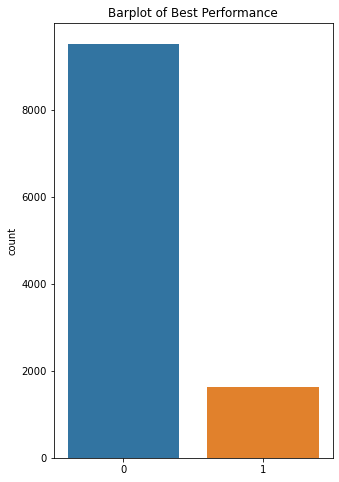

In [12]:
plt.figure(figsize = (5, 8))
sns.countplot(x = Y)
plt.title("Barplot of Best Performance")
plt.show()

**Insight**

Terdapat imbalance pada data. Pada variable `Best Performance` terdapat data bernilai `0` yang jauh lebih banyak di bandingkan dengan data bernilai `1`

### GPA

Mengecek anomalitas yang ada di variable `GPA`

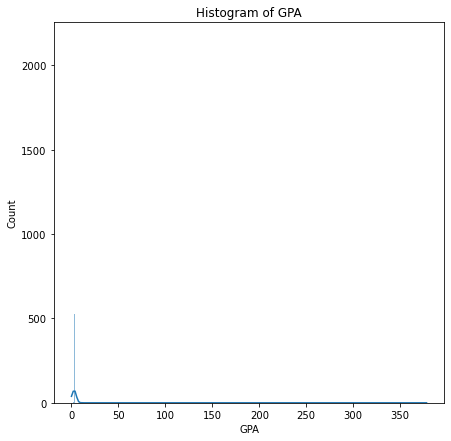

In [13]:
plt.figure(figsize = (7, 7))
sns.histplot(data = X, x = 'GPA', kde = True)
plt.title("Histogram of GPA")
plt.show()

**Insight**

Dapat diliat dari histogram di atas bahwa variable `GPA` mempunyai rentang data yang cukup jauh dari `0` - `380`. Untuk mengatasi hal ini perlu di lakukan scaling pada terhadap data.

In [14]:
X[X['GPA'] > 4]['GPA'].values

array([  7.28,   7.2 ,   4.19,   8.3 ,   6.82,   7.82,   7.  ,   8.69,
        45.  ,  45.29,  44.83,   8.1 ,  30.73,  43.57,   6.18,  32.12,
        75.  ,  53.06,   7.  ,  25.87,   7.49,  13.4 ,   6.36,  43.03,
         8.4 ,  22.  , 155.  ,  36.3 ,  47.35,  44.56,  66.  ,  13.43,
       293.  , 285.  , 303.  , 327.  , 318.  , 330.  , 317.  , 315.  ,
       313.  , 301.  , 331.  , 325.  , 180.  , 280.  , 302.  , 282.  ,
       320.  , 322.  , 368.  , 378.  ])

Dapat dilihat bahwa skala pengukurannya di sini cukup bervariasi. Akan dicoba diasumsikan bahwa GPA memiliki skala 

1. `0 - 4`
2. `0 - 40`
3. `0 - 400`

Sehingga pengubahan skala nya dengan metode untuk `0 - 40` akan dibagi dengan 10 dan `0 - 400` akan dibagi dengan 100

In [15]:
# Train
X.loc[(X['GPA'] > 4) & (X['GPA'] <= 40), 'GPA'] /= 10
X.loc[(X['GPA'] > 4) & (X['GPA'] > 40), 'GPA'] /= 100
# Test
test.loc[(test['GPA'] > 4) & (test['GPA'] <= 40), 'GPA'] /= 10
test.loc[(test['GPA'] > 4) & (test['GPA'] > 40), 'GPA'] /= 100

Plot ulang

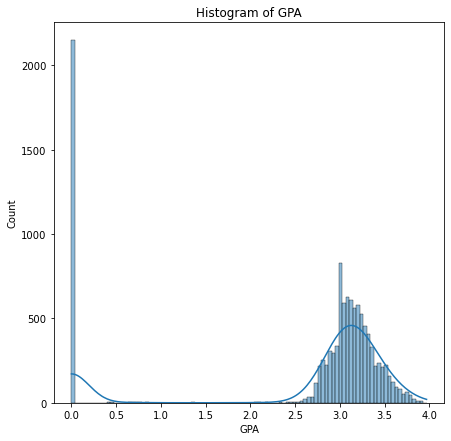

In [16]:
plt.figure(figsize = (7, 7))
sns.histplot(data = X, x = 'GPA', kde = True)
plt.title("Histogram of GPA")
plt.show()

### Splitting Data

Membagi data menjadi data latih (train) dan data validasi (valid). Karena terdapat imbalance pada data maka perlu di berikan penanganan khusus.

Pada Noteebook ini untuk menangani hal tersebut akan di lakukan `stratify` agar proporsi data `0` dan `1` pada data latih (train) dan data validasi (valid) sama

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2, 
                                                      random_state = SEED, stratify = Y)

Plot di bawah akan menunjukkan proporsi yang sama antara data train dan data valid.

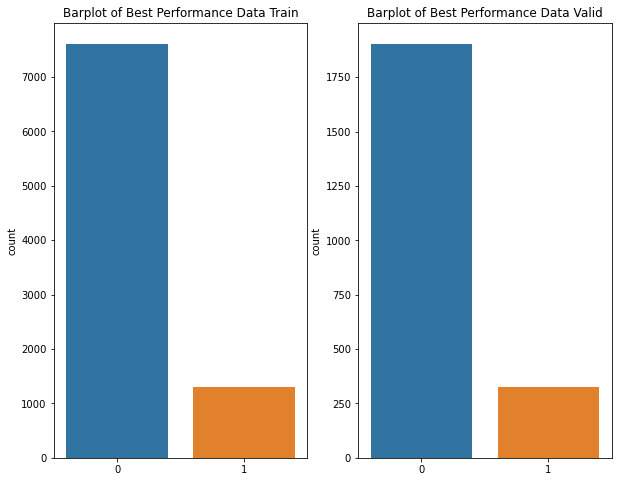

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 8))
sns.countplot(x = Y_train, ax = ax1)
ax1.set_title("Barplot of Best Performance Data Train")
sns.countplot(x = Y_valid, ax = ax2)
ax2.set_title("Barplot of Best Performance Data Valid")
plt.show()

## Modelling

Membuat Model untuk memprediksi. Pada Notebook ini akan di gunakan model dasar yaitu `Random Forest Classifier` 

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
model = RandomForestClassifier(n_estimators = 100, random_state = SEED)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2021)

### Cek Kebaikan Model

Mengecek kebaikan model yang telah di fit sebelumnya. Metrics yang digunakan untuk kompetisi ini adalah `AUC`

In [22]:
from sklearn.metrics import *

Untuk menghitung skor AUC dilakukan dengan menghitung probabilitas dari prediksi lalu ambil probabilitas untuk prediksi 1. misal

```
prediksi_1 = 0 : 0.82 ; 1 : 0.18
prediksi_2 = 0 : 0.90 ; 1 : 0.10
...
prediksi_n = 0 : 0.64 ; 1 : 0.36
```

maka yang akan di ambil yaitu [`0.18`, `0.10`, ..., `0.36`]

In [23]:
pred = model.predict_proba(X_valid)
model_auc = roc_auc_score(Y_valid, pred[:, 1])
print(f"AUC score untuk model adalah sebesar : {model_auc}")

AUC score untuk model adalah sebesar : 0.5915286986354175


Untuk melihat performa model secara lebih detil akan dilihat lewat plot `ROC AUC` dan juga `Histogram` dari prediksi.

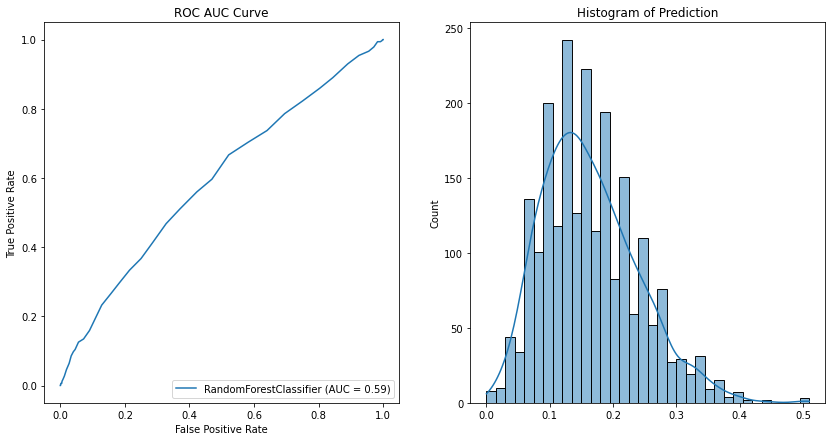

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 7))
plot_roc_curve(model, X_valid, Y_valid, ax = ax1)
ax1.set_title("ROC AUC Curve")
sns.histplot(x = pred[:, 1], ax = ax2, kde = True)
ax2.set_title("Histogram of Prediction")
plt.show()

**Insight**

Dapat disimpulkan dari 2 plot diatas bahwa model sangat kesulitan untuk mengenali tipe `1` pada variable target.

## Tuning Model

Setelah melihat hasil pada model, dapat dikatakan bahwa model memiliki performa yang tidak cukup baik untuk memprediksi data. Maka dari itu perlu dilakukan tunning pada hyperprameter model agar model dapat menghasilkan performa yang lebih baik

### Grid Search

GridSearch untuk mencari parameter terbaik dari model

In [25]:
from sklearn.model_selection import GridSearchCV

Inisiasi parameternya

In [26]:
tune_params = [
    {'n_estimators': list(range(90, 115, 5)), 
     "criterion": ["gini", "entropy"],
     'max_features': [5, 'auto', "log2"], 
     'max_depth': [2, 10, None], 
     "min_samples_split": [1, 2, 5],
     "min_samples_leaf": [5, 10, 15],
     "max_leaf_nodes": [10, 20, None],
     'bootstrap': [True, False]
    }
]

Modelling

In [27]:
model_tune = RandomForestClassifier(random_state = SEED)
model_grid = GridSearchCV(model_tune, tune_params, cv = 5, scoring = 'roc_auc', 
                          verbose = 2, n_jobs = -1)
model_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 4860 candidates, totalling 24300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2021),
             n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 10, None],
                          'max_features': [5, 'auto', 'log2'],
                          'max_leaf_nodes': [10, 20, None],
                          'min_samples_leaf': [5, 10, 15],
                          'min_samples_split': [1, 2, 5],
                          'n_estimators': [90, 95, 100, 105, 110]}],
             scoring='roc_auc', verbose=2)

Cek best params dari model

In [28]:
model_grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 5,
 'max_leaf_nodes': None,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'n_estimators': 100}

Cek kebaikan model

In [29]:
tune_pred = model_grid.best_estimator_.predict_proba(X_valid)
model_tune_auc = roc_auc_score(Y_valid, tune_pred[:, 1])
print(f"AUC score untuk model adalah sebesar   : {model_tune_auc}")
print(f"Tunning menghasilkan perbedaan sebesar : {model_tune_auc - model_auc}")

AUC score untuk model adalah sebesar   : 0.5849378742322617
Tunning menghasilkan perbedaan sebesar : -0.006590824403155726


Plotting Histogram & ROC

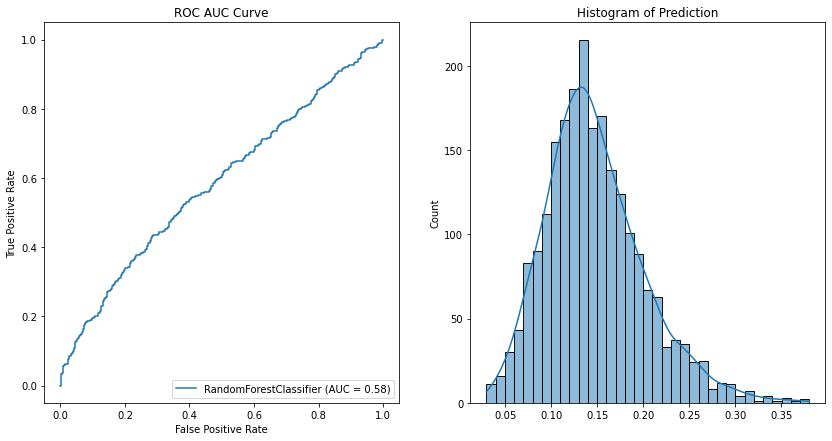

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 7))
plot_roc_curve(model_grid.best_estimator_, X_valid, Y_valid, ax = ax1)
ax1.set_title("ROC AUC Curve")
sns.histplot(x = tune_pred [:, 1], ax = ax2, kde = True)
ax2.set_title("Histogram of Prediction")
plt.show()

## Prediksi

`predict_proba` data test untuk mendapatkan probabilitas prediksiannya.

In [31]:
# No Tune Model
model_pred = model.predict_proba(test)
# Tune Model
model_tune_pred = model_grid.best_estimator_.predict_proba(test)

## Submission

Mengambil kolom ke 1 dari hasil prediksi lalu pack dalam file `csv`

In [32]:
sample = pd.read_csv("Data/Baru/sample_submission.csv")
# No tune Model
sample["Best Performance"] = model_pred[:, 1]
sample.to_csv("RandomForest - No Tune.csv", index = False)
# Tune Model
sample["Best Performance"] = model_tune_pred[:, 1]
sample.to_csv("RandomForest - GridSearch.csv", index = False)